# TD - Vectorisation de texte, représentation graphique et classification

Dans ce TD, nous nous intéressons à la représentation vectorielle de texte à partir de la méthode [Bag of words](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Nous étudierons les effets des différents paramètres sur la représentation obtenue. Nous étudierons également deux méthodes pour représenter graphiquement des données vectorielles de grande dimension.

In [397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys,os,os.path

%matplotlib inline

## L'ensemble de textes : SMS Spam Collection

Dans ce TD, nous utiliserons l'ensemble de textes qui se nomme « SMS Spam Collection v1. ». C'est une collection d'environ 5600 SMS, répartis en 2 groupes (spam et ham).

Pour plus de detaille : [site officiel](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/)

**À exécuter -** Pour chargez l'ensemble de textes, utiliez le code suivant

In [398]:
sms_dataset = pd.read_csv('SMSSpamCollection.txt', sep="\t", header=None, names=["label", "text"])

**À exécuter -** Vous pouvez afficher un échantillons du dataset de SMS et son analyse avec les codes suivants

In [399]:
sms_dataset.tail(10)

,label,text
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [400]:

count = 0
for line in sms_dataset['text']:
    for word in line.split(" "):
        count += 1
print(count)        

    
print()
sms_dataset.describe()

87533



,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


**Analyse -** L'ensemble de textes est-il équilibré ?

## Bag of words
### Création du dictionnaire

In [401]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

**Question -** Créez un `CountVectorizer` et utilisez le corpus de texte pour apprendre le dictionnaire de vectorisation ([CountVectorizer.fit()](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit)).

In [402]:
vectorizer = CountVectorizer()
vectorizer.fit(sms_dataset['text'])

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,'word'


**Question -** Quelle est la taille du dictionnaire obtenu (`CountVectorizer.vocabulary_`) ? Affichez les mots du dictionnaire, que pouvez-vous en conclure ?

In [403]:
print(len(vectorizer.vocabulary_))

print(', '.join(vectorizer.vocabulary_.keys()))

8713
go, until, jurong, point, crazy, available, only, in, bugis, great, world, la, buffet, cine, there, got, amore, wat, ok, lar, joking, wif, oni, free, entry, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, 87121, receive, question, std, txt, rate, apply, 08452810075over18, dun, say, so, early, hor, already, then, nah, don, think, he, goes, usf, lives, around, here, though, freemsg, hey, darling, it, been, week, now, and, no, word, back, like, some, fun, you, up, for, still, tb, xxx, chgs, send, 50, rcv, even, my, brother, is, not, speak, with, me, they, treat, aids, patent, as, per, your, request, melle, oru, minnaminunginte, nurungu, vettam, has, set, callertune, all, callers, press, copy, friends, winner, valued, network, customer, have, selected, receivea, 900, prize, reward, claim, call, 09061701461, code, kl341, valid, 12, hours, had, mobile, 11, months, or, more, entitled, update, the, latest, colour, mobiles, camera, co, on, 08002986030, gonna, be, home, so

### Réduction du nombre de mots dans le dictionnaire

Dans un premier temps, nous utiliserons les méthodes vue en cours pour réduire le nombre de mots dans le dictionnaire.

**À faire -** Àjoutez l'arguement `stop_words='english'` à la contruction du `CountVectorizer` pour retirer les stop words du dictionnaire.

**Question -** Quelle est la taille du dictionnaire alors obtenu ?

In [404]:
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(sms_dataset['text']);
print('Nombre de mots dans le dictionnaire :', len(vectorizer.vocabulary_))

Nombre de mots dans le dictionnaire : 8444



Nous avons vu en cours qu'il existe pour chaque langue et pour un grand nombre de mots de cette langue un sous-ensemble de mots dérivés.  Pour réduire la taille du vocabulaire, nous conservons l'élément racine de ces sous ensembles.

Nous allons utiliser la méthode `SnowballStemmer` pour extraire de la racine des mots (stemming).

**À exécuter -** Nous surchargons les classes `CountVectorizer` et `TfidfVectorizer` pour àjouter l'extraction de la racine des mots dans leures méthodes d'analyses.

In [405]:
import nltk.stem
english_stemmer=nltk.stem.SnowballStemmer('english')
class EnglishStemmedCountVectorizer(CountVectorizer): #EnglishStemmedCountVectorizer hérite de CountVectorizer
    def build_analyzer(self):
        analyzer = super(EnglishStemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))
    
class EnglishStemmedTfidfVectorizer(TfidfVectorizer):#EnglishStemmedTfidVectorizer hérite de TfidVectorizer
    def build_analyzer(self):
        analyzer = super(FrenchStemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

**À faire -** Utiliez le vectorizer `EnglishStemmedCountVectorizer`, que nous venons de créer et àjoutez l'arguement `stop_words='english'` à sa contruction pour retirer les stop words du dictionnaire.

**Question -** Quelle est la taille du dictionnaire alors obtenu ?

In [406]:
vectorizer=EnglishStemmedCountVectorizer()
vectorizer.fit(sms_dataset['text']);
print('Nombre de mots dans le dictionnaire :', len(vectorizer.vocabulary_))

Nombre de mots dans le dictionnaire : 7359


Maintenant, pour réduire le nombre de mots dans le dictionnaire, nous allons étudier la **fréquence d'apparition des mots dans les documents** ou *document frequency* en anglais.

**Question -** Utilisez la fonction [CountVectorizer.transform()](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.transform) pour vectoriser les documents du corpus de texte. 

In [407]:
X = vectorizer.transform(sms_dataset['text'])

**À exécuter -** Pour calculer la fréquence d'apparition de chaque mot dans les documents à partir des documents vectoriser, nous utiliserons la fonction suivante :

In [408]:
def compute_document_frequency(X):
    df = np.mean(X>0, axis=0)
    df = np.asarray(df).reshape(-1) # convertie un numpy.matrix en numpy.ndarray
    return df

**À exécuter -** Pour affichez l'histogramme de la fréquence d'apparition des mots dans les documents du corpus de texte, nous utiliserons la fonction suivante.

In [409]:
def plot_hist_df(df, bins=None, yscale='linear'):
    fig = plt.figure(figsize=(6,6));
    ax = fig.gca();
    ax.hist(df,bins);
    ax.set_yscale(yscale);
    ax.set_xbound([np.min(df),np.max(df)]);
    ax.set_xlabel('Document frequency');
    ax.set_ylabel('Nombre de mot');

**Question -** À l'aide des deux fonction que nous venons de définir, affichez l'histogramme de la fréquence d'apparition des mots dans les documents de notre ensemble de SMS

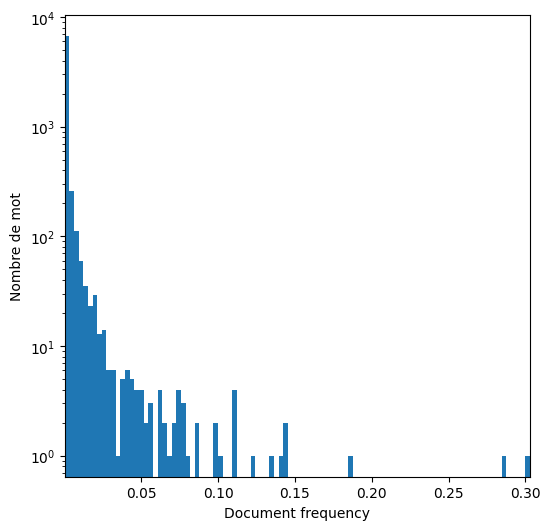

In [410]:
df = compute_document_frequency(X)
plot_hist_df(df, 100, 'log')


**Analyse -** Qu'est-ce que cela signifie ? Est-il intéressant d'avoir des mots avec une fréquence proche de 1 ou de 0 ?

**Question -** A l'aide de la fonction [CountVectorizer.inverse_transform()](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.inverse_transform), quels sont les mots du dictionnaire qui ont une fréquence trop petite (par exemple avec un df < 0.001) ?

In [411]:
print('Liste des mots trop peu fréquents dans les documents : ' 
      + ', '.join(vectorizer.inverse_transform(df.reshape(1, -1)<0.001)[0]))
      

Liste des mots trop peu fréquents dans les documents : 000pes, 008704050406, 0089, 0121, 01223585236, 01223585334, 0125698789, 0207, 02072069400, 02073162414, 02085076972, 021, 0430, 05, 050703, 0578, 07, 07008009200, 07046744435, 07090201529, 07090298926, 07099833605, 07123456789, 0721072, 07732584351, 07734396839, 07742676969, 07753741225, 0776xxxxxxx, 07781482378, 07786200117, 077xxx, 078, 07801543489, 07808, 07808247860, 07808726822, 07815296484, 07821230901, 078498, 07880867867, 0789xxxxxxx, 07946746291, 0796xxxxxx, 07973788240, 07xxxxxxxxx, 08, 08000407165, 08000776320, 08000938767, 08001950382, 08002888812, 08002986030, 08002986906, 08002988890, 08006344447, 0808, 08081263000, 08081560665, 0825, 083, 0844, 08448350055, 08448714184, 0845, 08450542832, 08452810071, 08452810073, 08452810075over18, 08700435505150p, 08700469649, 08700621170150p, 08701213186, 08701237397, 08701417012, 08701417012150p, 0870141701216, 087016248, 08701752560, 087018728737, 0870241182716, 08702490080, 087

**Question -** A l'aide des parametres **`min_df`** et **`max_df`** de la classe [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), filtrer les mots avec des fréquences indésirables.

Quelle est la taille du dictionnaire alors obtenu ?

Affichez alors le nouvel l'histogramme de la fréquence d'apparition des mots dans les documents du corpus de texte ([matplotlib.pyplot.hist()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist)).

Nombre de mots dans le dictionnaire : 7152
Nombre de mots dans le dictionnaire : 4
Nombre de mots dans le dictionnaire : 131


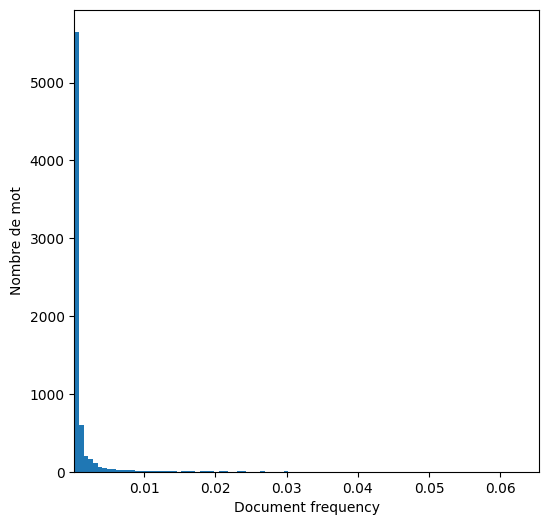

In [412]:
min_df=0.0001
max_df=1.0

vectorizer = EnglishStemmedCountVectorizer(stop_words='english',min_df=min_df, max_df=max_df)
vectorizer.fit(sms_dataset['text'])
print('Nombre de mots dans le dictionnaire :', len(vectorizer.vocabulary_))

X = vectorizer.transform(sms_dataset['text']).toarray()
df = compute_document_frequency(X)

min_df=0.05
max_df=1.0

vectorizer2 = EnglishStemmedCountVectorizer(stop_words='english',min_df=min_df, max_df=max_df)
vectorizer2.fit(sms_dataset['text'])
print('Nombre de mots dans le dictionnaire :', len(vectorizer2.vocabulary_))

X2 = vectorizer2.transform(sms_dataset['text']).toarray()

min_df=0.01
max_df=1.0

vectorizer3 = EnglishStemmedCountVectorizer(stop_words='english',min_df=min_df, max_df=max_df)
vectorizer3.fit(sms_dataset['text'])
print('Nombre de mots dans le dictionnaire :', len(vectorizer3.vocabulary_))

X3 = vectorizer3.transform(sms_dataset['text']).toarray()

plot_hist_df(df, 100, 'linear')

## Visualisation

Nous avons vu en cours qu'il est intéressant de visualiser les données pour juger de la qualité de la représentation. 

**À exécuter -**  Pour visualiser en regardant les dimensions deux à deux, nous utilions la fonction suivante

In [413]:
def plot_croises(X,y,target_names, threshold = 1.0):
    uy = np.unique(y)
    nb_class=len(uy)
    nb_feat=X.shape[1]
    if nb_feat%2:
        ncols=int((nb_feat-1)/2)
        nrows=nb_feat
    else:
        ncols=int(nb_feat/2)
        nrows=nb_feat-1
    plt.figure(figsize=(8, 16))
    col=['b','r','g','c','m','y','k']
    for t in range(nb_class):
        k=1
        for i in range(nb_feat-1):
            for j in range(i+1,nb_feat):
                plt.subplot(nrows,ncols,k)
                
                x_t = X[y == uy[t],i]
                y_t = X[y == uy[t],j]
                
                x_mean = np.mean(x_t)
                y_mean = np.mean(y_t)
                
                dist = (x_t-x_mean)**2 + (y_t-y_mean)**2
                
                
                dist_max = np.sort(dist)[int(np.floor((dist.shape[0]-1)*threshold))]
                
                plt.scatter(x_t[dist<dist_max], y_t[dist<dist_max], color=col[t],lw=2,marker='o',label=target_names[t], alpha=0.5)
                plt.ylabel('Dim. ' + str(j+1))
                plt.xlabel('Dim. ' + str(i+1))
                k=k+1
    plt.legend(bbox_to_anchor=(2,2))  
    plt.tight_layout()  
    

**À exécuter -** Nous pouvons alors visualiser les 6 premières dimensions de notre représentation par Bag of words

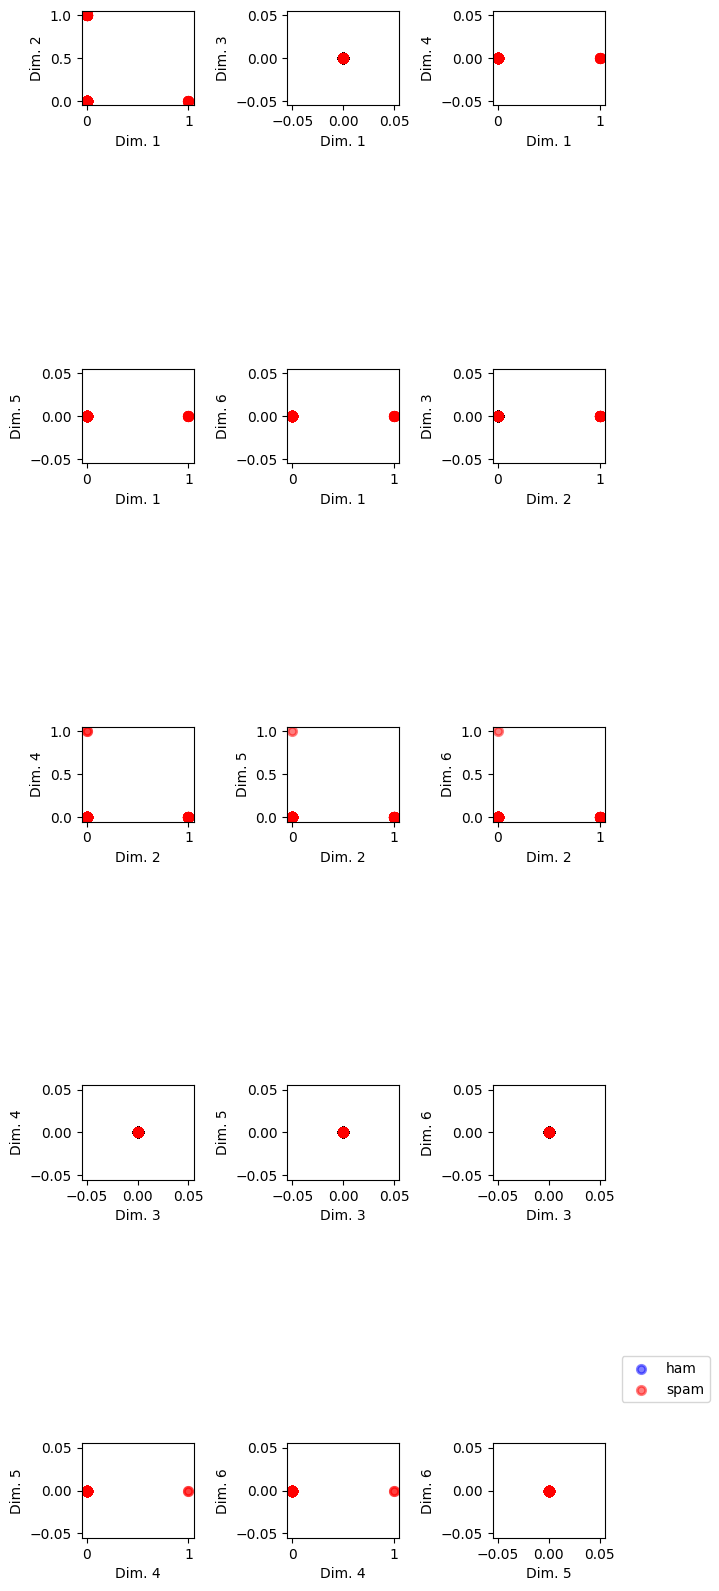

In [414]:
plot_croises(X[:,:6],sms_dataset['label'],sms_dataset['label'].unique())

**Analyse -** Que constatez vous ?

### Analyse en Composantes Principales

Une méthodes tres couramments utilisée qui permet de visualiser les données est l'utilisation de [Analyse en Composantes Principales](https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales)(ACP), qui est disponible dans [sklearn.decomposition.PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [415]:
from sklearn.decomposition import PCA

**Question** A l'aide de l'ACP, réduisez la dimension de la signature à 6 dimensions et visualisez-les deux à deux avec la fonction `plot_croises()`.

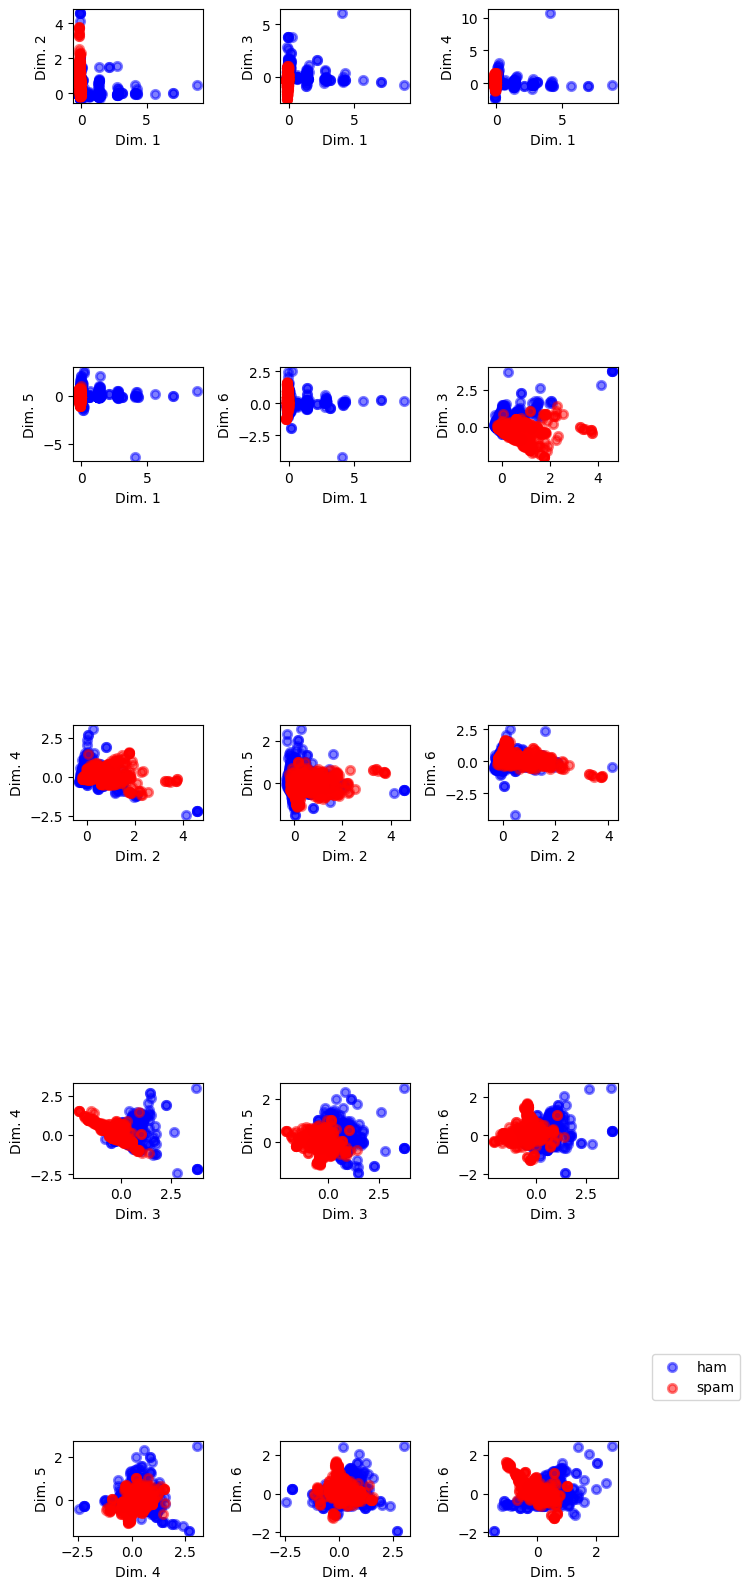

In [416]:
pca = PCA(n_components=6)#,whiten=True
pca.fit(X)
X_redui = pca.transform(X)
plot_croises(X_redui, sms_dataset['label'], sms_dataset['label'].unique())

**Analyse -** Le résultat obtenu est-il plus facilement lisible ? Pourquoi ? 

## Discrimination par régression logistique

### Mise en oeuvre

Nous aurons besoin de la classe `LogisticRegression`, d'une méthode découpant en un ensemble d'apprentissage et de test, `train_test_split` et éventuellement des méthodes d'analyse et rapport `confusion_matrix`, `classification_report`.

**À exécuter -** Celles-ci sont importées par

In [417]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report    

**À faire -**
 - définir une base de test et une base d'apprentissage en utilisant la méthode `train_test_split`
 - instancier la classe `LogisticRegression`, par exemple sous le nom `cls`, puis apprendre par la méthode `fit` et prédire par `predict`. 

In [418]:
train_X, test_X, train_y, test_y = train_test_split(X, sms_dataset['label'])

cls = LogisticRegression(class_weight='balanced')
cls.fit(train_X, train_y)
y_pred = cls.predict(test_X)



**À faire -** Visualiez quels sont les coefficients obtenus par `cls.intercept_` et `cls.coef_`

In [419]:
print(cls.intercept_)

[-3.38258673]


In [420]:
print(cls.coef_)

[[ 0.56664906  0.71266221 -0.0081296  ... -0.00592079  0.11640153
  -0.00490973]]


**À faire -** Utiliez la fonction `classification_report` pour visualiez les performances de classification

In [421]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1198
        spam       0.97      0.90      0.93       195

    accuracy                           0.98      1393
   macro avg       0.98      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393



**À exécuter -** Pour afficher la matrice de confusion, nous utiliserons la fonction suivante

In [422]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**À faire -** Utiliez la fonction `confusion_matrix` pour calculer la matrice de confusion et utiliez la fonction que nous venons de définir pour l'afficher

In [423]:
confusion_matrix(test_y, y_pred)

array([[1193,    5],
       [  20,  175]])

**Analyse -** Analysez la matrice de confusion obtenue, le résultat est-il cohérent avec la visualisation obtenue en utilisant l'ACP ?

**À faire -** Àjoutez l'arguement `class_weight='balanced'` à la contruction de `LogisticRegression`.

**Question -** Observez les effets sur les performances de classification

In [424]:
print("//////////////// 1 ///////////////////")
print("Nombre de mots dans le dictionnaire :", len(vectorizer.vocabulary_))
print()


train_X, test_X, train_y, test_y = train_test_split(
    X, sms_dataset['label'], test_size=0.2, random_state=42, stratify=sms_dataset['label']
)

cls = LogisticRegression(class_weight='balanced')
cls.fit(train_X, train_y)
y_pred = cls.predict(test_X)
score = cls.score(test_X, test_y)
print(score)
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))






//////////////// 1 ///////////////////
Nombre de mots dans le dictionnaire : 7152

0.9820627802690582
[[960   6]
 [ 14 135]]
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.96      0.91      0.93       149

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [425]:
print("//////////////// OPTIMISATION //////////////////")
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Use raw text to avoid any data leakage
X_text = sms_dataset['text']
y = sms_dataset['label']
X_train, X_test, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42, stratify=y
)

pipe = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english', sublinear_tf=True)),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=2000, solver='liblinear'))
])

param_grid = {
    'vect__min_df': [0.001, 0.005, 0.01],
    'vect__ngram_range': [(1,1), (1,2)],
    'vect__max_df': [0.9, 1.0],
    'vect__max_features': [None, 10000, 20000],
    'clf__C': [0.5, 1, 2, 5, 10],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, n_jobs=-1, scoring='f1_macro', verbose=0)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


//////////////// OPTIMISATION //////////////////
Best params: {'clf__C': 1, 'vect__max_df': 0.9, 'vect__max_features': None, 'vect__min_df': 0.001, 'vect__ngram_range': (1, 2)}
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.92      0.93      0.92       149

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[954  12]
 [ 11 138]]
Accuracy: 0.979372197309417


**À faire -** Faites varier le parametre **`min_df`** de la classe [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

**Question -** Observez les effets sur la visualisation et sur les performances de classification